In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#!python -m spacy download en_core_web_md


In [2]:
#!python -m spacy download en_core_web_sm

In [3]:
book=pd.read_csv("data.txt",error_bad_lines=False)
book

b'Skipping line 16: expected 1 fields, saw 2\nSkipping line 17: expected 1 fields, saw 2\nSkipping line 26: expected 1 fields, saw 2\nSkipping line 27: expected 1 fields, saw 2\nSkipping line 31: expected 1 fields, saw 2\nSkipping line 37: expected 1 fields, saw 3\nSkipping line 44: expected 1 fields, saw 2\nSkipping line 54: expected 1 fields, saw 3\nSkipping line 74: expected 1 fields, saw 2\nSkipping line 75: expected 1 fields, saw 2\nSkipping line 77: expected 1 fields, saw 3\nSkipping line 82: expected 1 fields, saw 2\nSkipping line 83: expected 1 fields, saw 3\nSkipping line 85: expected 1 fields, saw 2\nSkipping line 90: expected 1 fields, saw 2\nSkipping line 92: expected 1 fields, saw 3\nSkipping line 109: expected 1 fields, saw 3\nSkipping line 116: expected 1 fields, saw 2\nSkipping line 119: expected 1 fields, saw 2\nSkipping line 122: expected 1 fields, saw 2\nSkipping line 124: expected 1 fields, saw 2\nSkipping line 129: expected 1 fields, saw 2\nSkipping line 131: expec

,x
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1486,@vistacruiser7 @flcnhvy There’s some of that too
1487,@PPathole Make sure to read ur terms &amp; con...
1488,@TeslaGong @PPathole Samwise Gamgee
1489,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
book1=[x.strip() for x in book.x]
book1

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\r\nAll thought he would fail,\r\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It’s getting real',
 '@freewalletorg Thanks for fixing',
 '@freewalletorg Please unlock my account',
 '@AstroJordy <U+0001F923><U+0001F923>',
 'This is true power haha https://t.co/Fc9uhQSd7O',
 '@freewa

In [13]:
for i in book.x:
    #print(i)
    z=i.strip(" ")
    print(z)
   

@kunalb11 I’m an alien
@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
@joerogan @Spotify Great interview!
@gtera27 Doge is underestimated
@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
Happy New Year of the Ox! https://t.co/9WFKMYu2oj
Frodo was the underdoge,
All thought he would fail,
Himself most of all. https://t.co/zGxJFDzzrM
@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.
The most entertaining outcome is the most likely
@GiveDirectly Just sent some
Just agree to do Clubhouse with @kanyewest
https://t.co/3rWE9uHSTS
@geoffkeighley @UnrealEngine It’s getting real
@freewalletorg Thanks for fixing
@freewalletorg Please unlock my account
@AstroJordy <U+0001F923><U+0001F923>
This is true power haha https://t.co/Fc9uhQSd7O
@freewalletorg Any crypto wallet that won’t give you your private keys should be avoide

In [11]:
 print(z)

Progress update August 28


In [10]:
nlp = spacy.load('en_core_web_sm')

one_block = book[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

C:\Users\Pritam\anaconda3\lib\site-packages\spacy\displacy\__init__.py:200: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [11]:
one_block

'@joerogan @Spotify Great interview!'

In [12]:
for token in doc_block[0:20]:
    print(token, token.pos_)

@joerogan PROPN
@Spotify VERB
Great ADJ
interview NOUN
! PUNCT


In [13]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

[]


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,spotify,1
1,interview,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

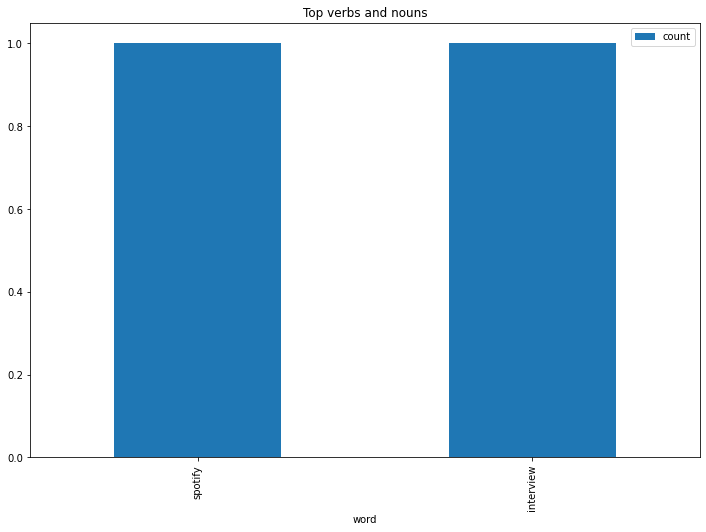

In [15]:
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

# Emotion mining

In [16]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
book=pd.read_csv("data.txt",error_bad_lines=False)
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x]

b'Skipping line 16: expected 1 fields, saw 2\nSkipping line 17: expected 1 fields, saw 2\nSkipping line 26: expected 1 fields, saw 2\nSkipping line 27: expected 1 fields, saw 2\nSkipping line 31: expected 1 fields, saw 2\nSkipping line 37: expected 1 fields, saw 3\nSkipping line 44: expected 1 fields, saw 2\nSkipping line 54: expected 1 fields, saw 3\nSkipping line 74: expected 1 fields, saw 2\nSkipping line 75: expected 1 fields, saw 2\nSkipping line 77: expected 1 fields, saw 3\nSkipping line 82: expected 1 fields, saw 2\nSkipping line 83: expected 1 fields, saw 3\nSkipping line 85: expected 1 fields, saw 2\nSkipping line 90: expected 1 fields, saw 2\nSkipping line 92: expected 1 fields, saw 3\nSkipping line 109: expected 1 fields, saw 3\nSkipping line 116: expected 1 fields, saw 2\nSkipping line 119: expected 1 fields, saw 2\nSkipping line 122: expected 1 fields, saw 2\nSkipping line 124: expected 1 fields, saw 2\nSkipping line 129: expected 1 fields, saw 2\nSkipping line 131: expec

In [20]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[5:15]

['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\r\nAll thought he would fail,\r\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won’t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission!',
 'https://t.co/3pWt… @ajtourville Yes @RationalEtienne @Adamklotz_ SpaceX needs to pas

In [21]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
610,@burakaydik True Best use of the term “Full St...
611,@PPathole @IheartTesla For sure.
612,This is both great &amp; terrifying.
613,Everything we’ve ever sensed or thought has be...


In [22]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [23]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [24]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [25]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    13
1     4
2     4
3    13
4     8
5     6
6    14
7    10
8     8
9    84
Name: word_count, dtype: int64

In [26]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
34,Starship SN9 &amp; SN10 https://t.co/urtPJn7am...,9,53
474,That bs has been pushed by Eberhard (worst per...,9,91
505,Latter also s… https://t.co/dlMy5rybrK @NASASp...,9,91
591,Thanks Just stop @EvaFoxU <U+0001F495><U+0001F...,9,75
83,@BoredElonMusk <U+0001F923><U+0001F923> @erigg...,9,62
132,There’s some great AI out ther… https://t.co/v...,10,54
541,<U+0001F622> https://t.co/adojS2UCe3 @vistacru...,12,73
64,@teslaownersSV This is a good one @MrBeastYT I...,13,38
386,@WholeMarsBlog Yes @BabyTesla3 @WholeMarsBlog ...,17,84
29,@Adamklotz_ @Erdayastronaut @SpaceX Yes I am b...,19,161


In [27]:
sent_df['sentiment_value'].describe()

count    615.000000
mean       1.323577
std        2.559586
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       19.000000
Name: sentiment_value, dtype: float64

In [28]:
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14


In [29]:
sent_df['index']=range(0,len(sent_df))

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

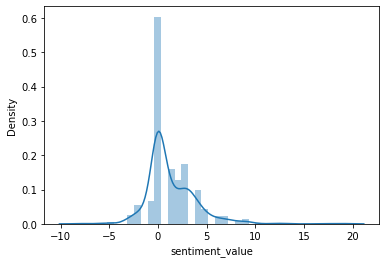

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

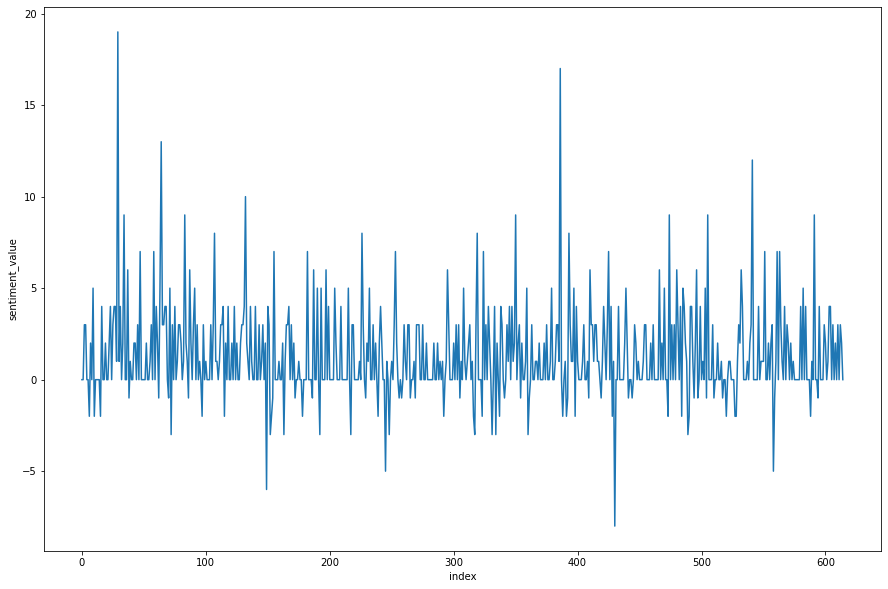

In [31]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

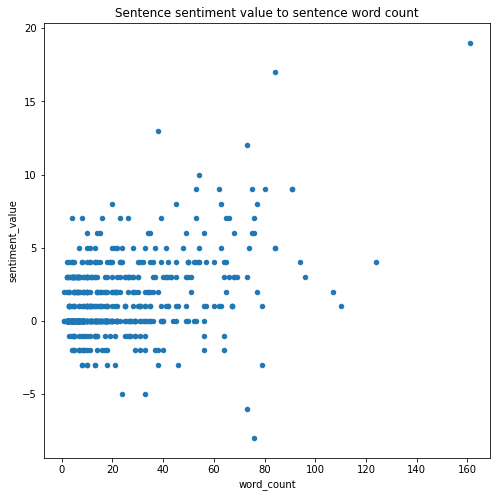

In [32]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')